In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

import seaborn as sb

In [2]:
chromConvert = {
               'chr_09': 0, 
               'chr_9_inversion': 1
               }

In [3]:
chromConvert_reverse = {
                0: 'chr_09',
                1: 'chr_9_inversion'
               }

In [4]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

# Load test and predict values

In [5]:
y_test_all = []
y_predict_all = []
y_predict_filtered_all = []

In [6]:
for iterationNumber in range(5):
    with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_test:
        y_test_all.append(np.load(f_y_test))
        
    with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict:
        y_predict_all.append(np.load(f_y_predict))                             
                        
    with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict_filtered:
        y_predict_filtered_all.append(np.load(f_y_predict_filtered))

In [7]:
y_predict_all[0].shape

(87, 2)

In [8]:
y_predict_all

[array([[9.9999976e-01, 3.2608989e-07],
        [1.0000000e+00, 4.2159273e-11],
        [1.0000000e+00, 1.4825360e-09],
        [9.9999535e-01, 1.1079063e-05],
        [9.9986112e-01, 1.5910809e-04],
        [9.9999869e-01, 3.2101982e-06],
        [1.0000000e+00, 7.5027256e-15],
        [1.0000000e+00, 1.1465010e-08],
        [9.9999988e-01, 2.0915742e-07],
        [1.0000000e+00, 3.7356196e-10],
        [1.0000000e+00, 2.3466940e-09],
        [1.0000000e+00, 1.9241530e-11],
        [9.9999940e-01, 1.3048175e-06],
        [9.9999988e-01, 1.8779440e-07],
        [9.9999988e-01, 2.3467472e-07],
        [1.0000000e+00, 5.4436282e-09],
        [9.9999928e-01, 9.5818973e-07],
        [9.9991262e-01, 1.9883568e-04],
        [1.0000000e+00, 3.5510663e-08],
        [1.0000000e+00, 7.2741604e-09],
        [9.9799013e-01, 2.9717884e-03],
        [1.0000000e+00, 6.7229486e-08],
        [9.3224436e-01, 9.8669261e-02],
        [1.0000000e+00, 8.3102719e-08],
        [9.9999988e-01, 2.0277878e-07],


In [9]:
y_test_concatenate_list = []
y_predict_concatenate_list = []
y_predict_filtered_concatenate_list = []

In [10]:
for i in range(5):
    y_test_concatenate_list.extend(list(y_test_all[i]))
    y_predict_concatenate_list.extend(list(y_predict_all[i]))
    y_predict_filtered_concatenate_list.extend(list(y_predict_filtered_all[i]))

In [11]:
y_predict_all[0].shape

(87, 2)

In [12]:
label_convert

['chr_09', 'chr_9_inversion']

In [13]:
len(y_test_concatenate_list)

433

In [14]:
len(y_predict_filtered_concatenate_list)

433

In [15]:
len(y_predict_concatenate_list)

433

# Classification Report

## Accuracy

In [16]:
acc = accuracy_score(y_test_concatenate_list, y_predict_filtered_concatenate_list, normalize=True, sample_weight=None)
print('Accuracy is ', acc)

Accuracy is  0.9260969976905312


## Precision, Recall, and F1

In [17]:
performanceReport = classification_report(y_test_concatenate_list, y_predict_filtered_concatenate_list, digits=6,
                                          target_names=label_convert)


print(performanceReport)

                 precision    recall  f1-score   support

         chr_09   0.941860  0.934615  0.938224       260
chr_9_inversion   0.902857  0.913295  0.908046       173

       accuracy                       0.926097       433
      macro avg   0.922359  0.923955  0.923135       433
   weighted avg   0.926277  0.926097  0.926167       433



## Confusion Matrix

In [18]:
cm = np.array(confusion_matrix(y_test_concatenate_list, y_predict_filtered_concatenate_list))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Combination_of_CrossValidation_KaryoType_CNN.csv')
confusion

,chr_09,chr_9_inversion
chr_09,243,17
chr_9_inversion,15,158


### 3.10.4 Rate of Confusion Matrix

### 3.10.5 Recall (查全率)，(Sensitivity Rate)

In [19]:
subtotal = [0] * 2  
for item in y_test_concatenate_list:
    subtotal[item] = subtotal[item] + 1

#### predict number divided by y test

In [20]:
cm_r = []
for i in range(2):
    cm_r.append(cm[i]/subtotal[i])

In [21]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion_r.to_csv('ConfusionMatrix_Recall_Integration_CNN.csv')
confusion_r

,chr_09,chr_9_inversion
chr_09,0.934615,0.065385
chr_9_inversion,0.086705,0.913295


### 3.10.6 Precision (查准率）

In [22]:
subtotal_predict = [0] * 2 
for item in y_predict_filtered_concatenate_list:
    subtotal_predict[item] = subtotal_predict[item] + 1

#### predict number divided by y predicted

In [23]:
cm_p = []
for i in range(2):
    cm_p.append(cm[:,i]/subtotal_predict[i])

In [24]:
confusion_p = pd.DataFrame(cm_p, index=label_convert,
                        columns=label_convert)
confusion_p.to_csv('ConfusionMatrix_Precision_Integration_CNN.csv')
confusion_p

,chr_09,chr_9_inversion
chr_09,0.941860,0.058140
chr_9_inversion,0.097143,0.902857


#### Heat Map: Number

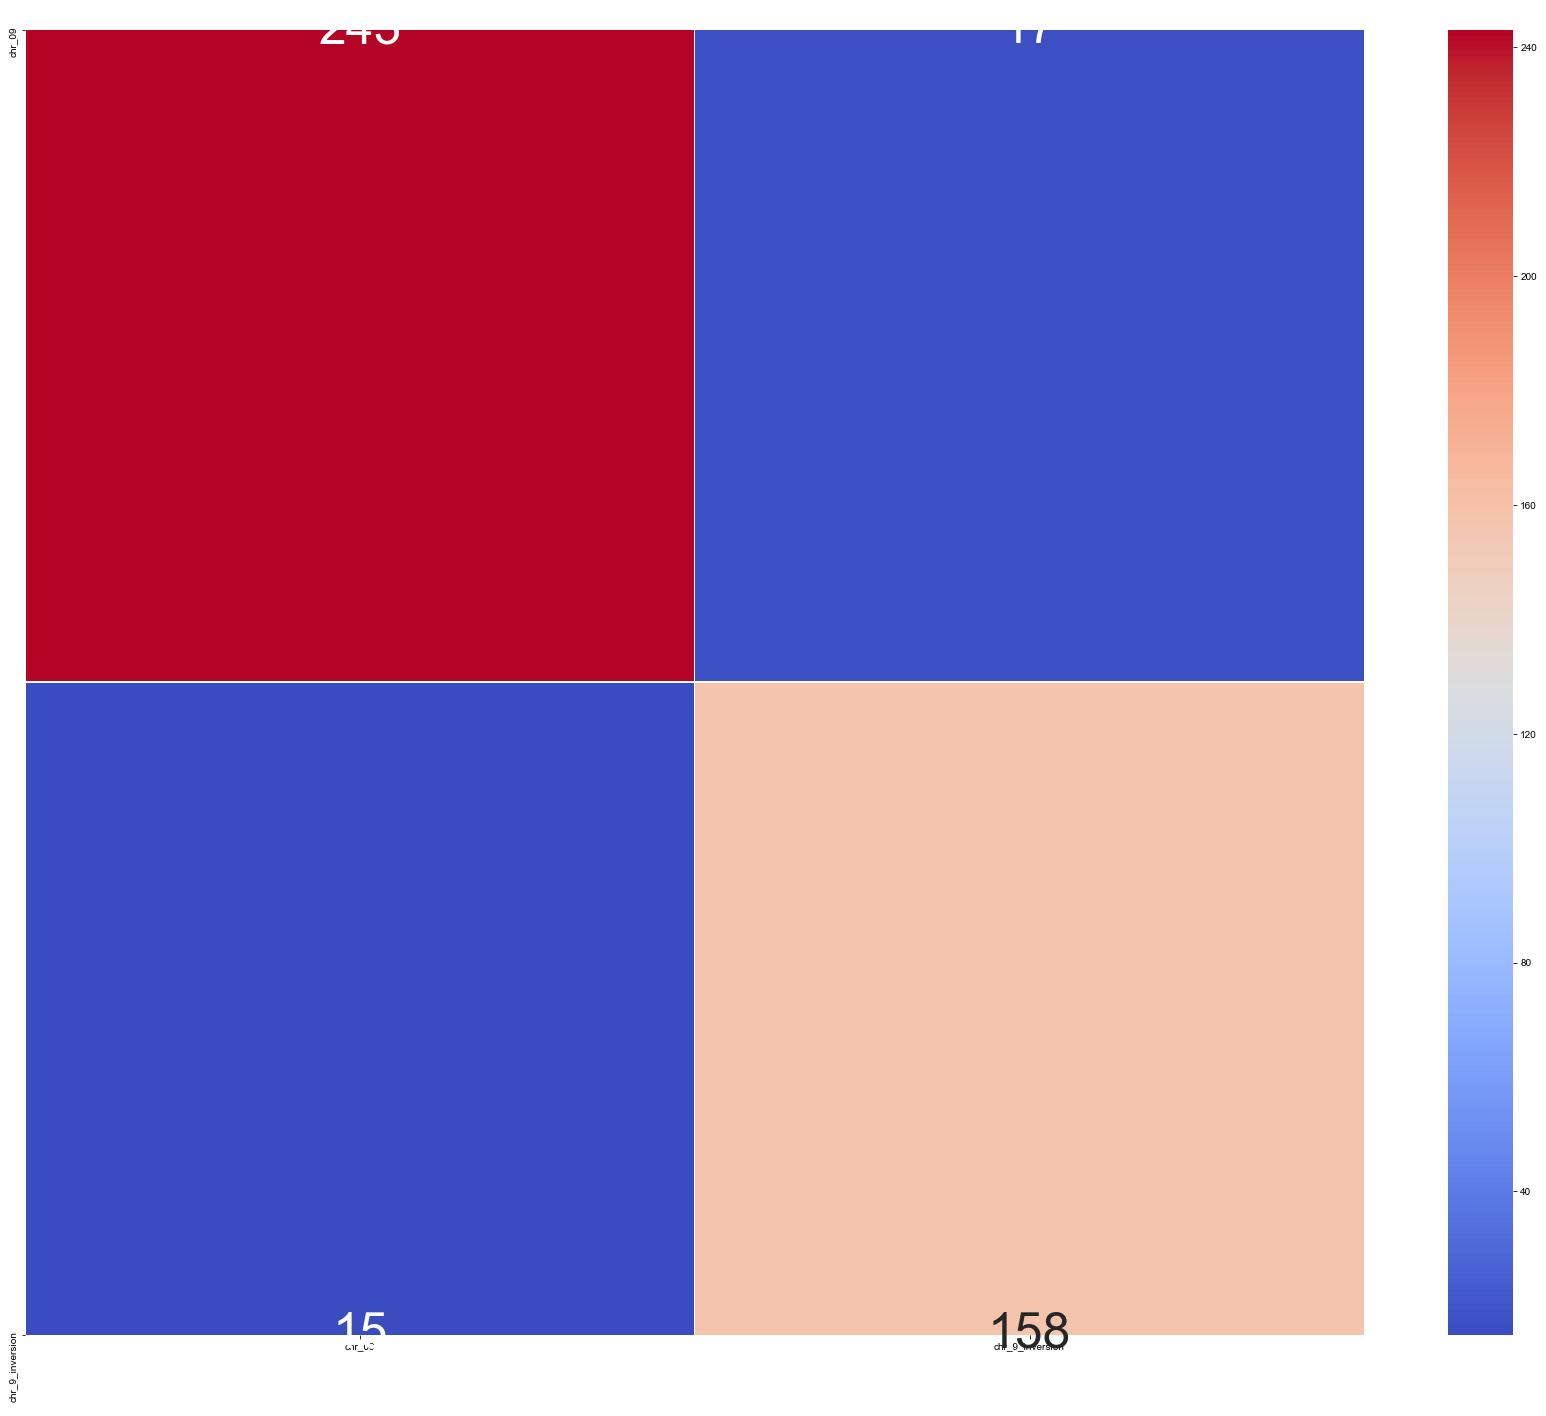

In [25]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, fmt='g', # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 50})
sb.set(font_scale = 3)


#### Heat Map of Recall: Rate (important!!!)

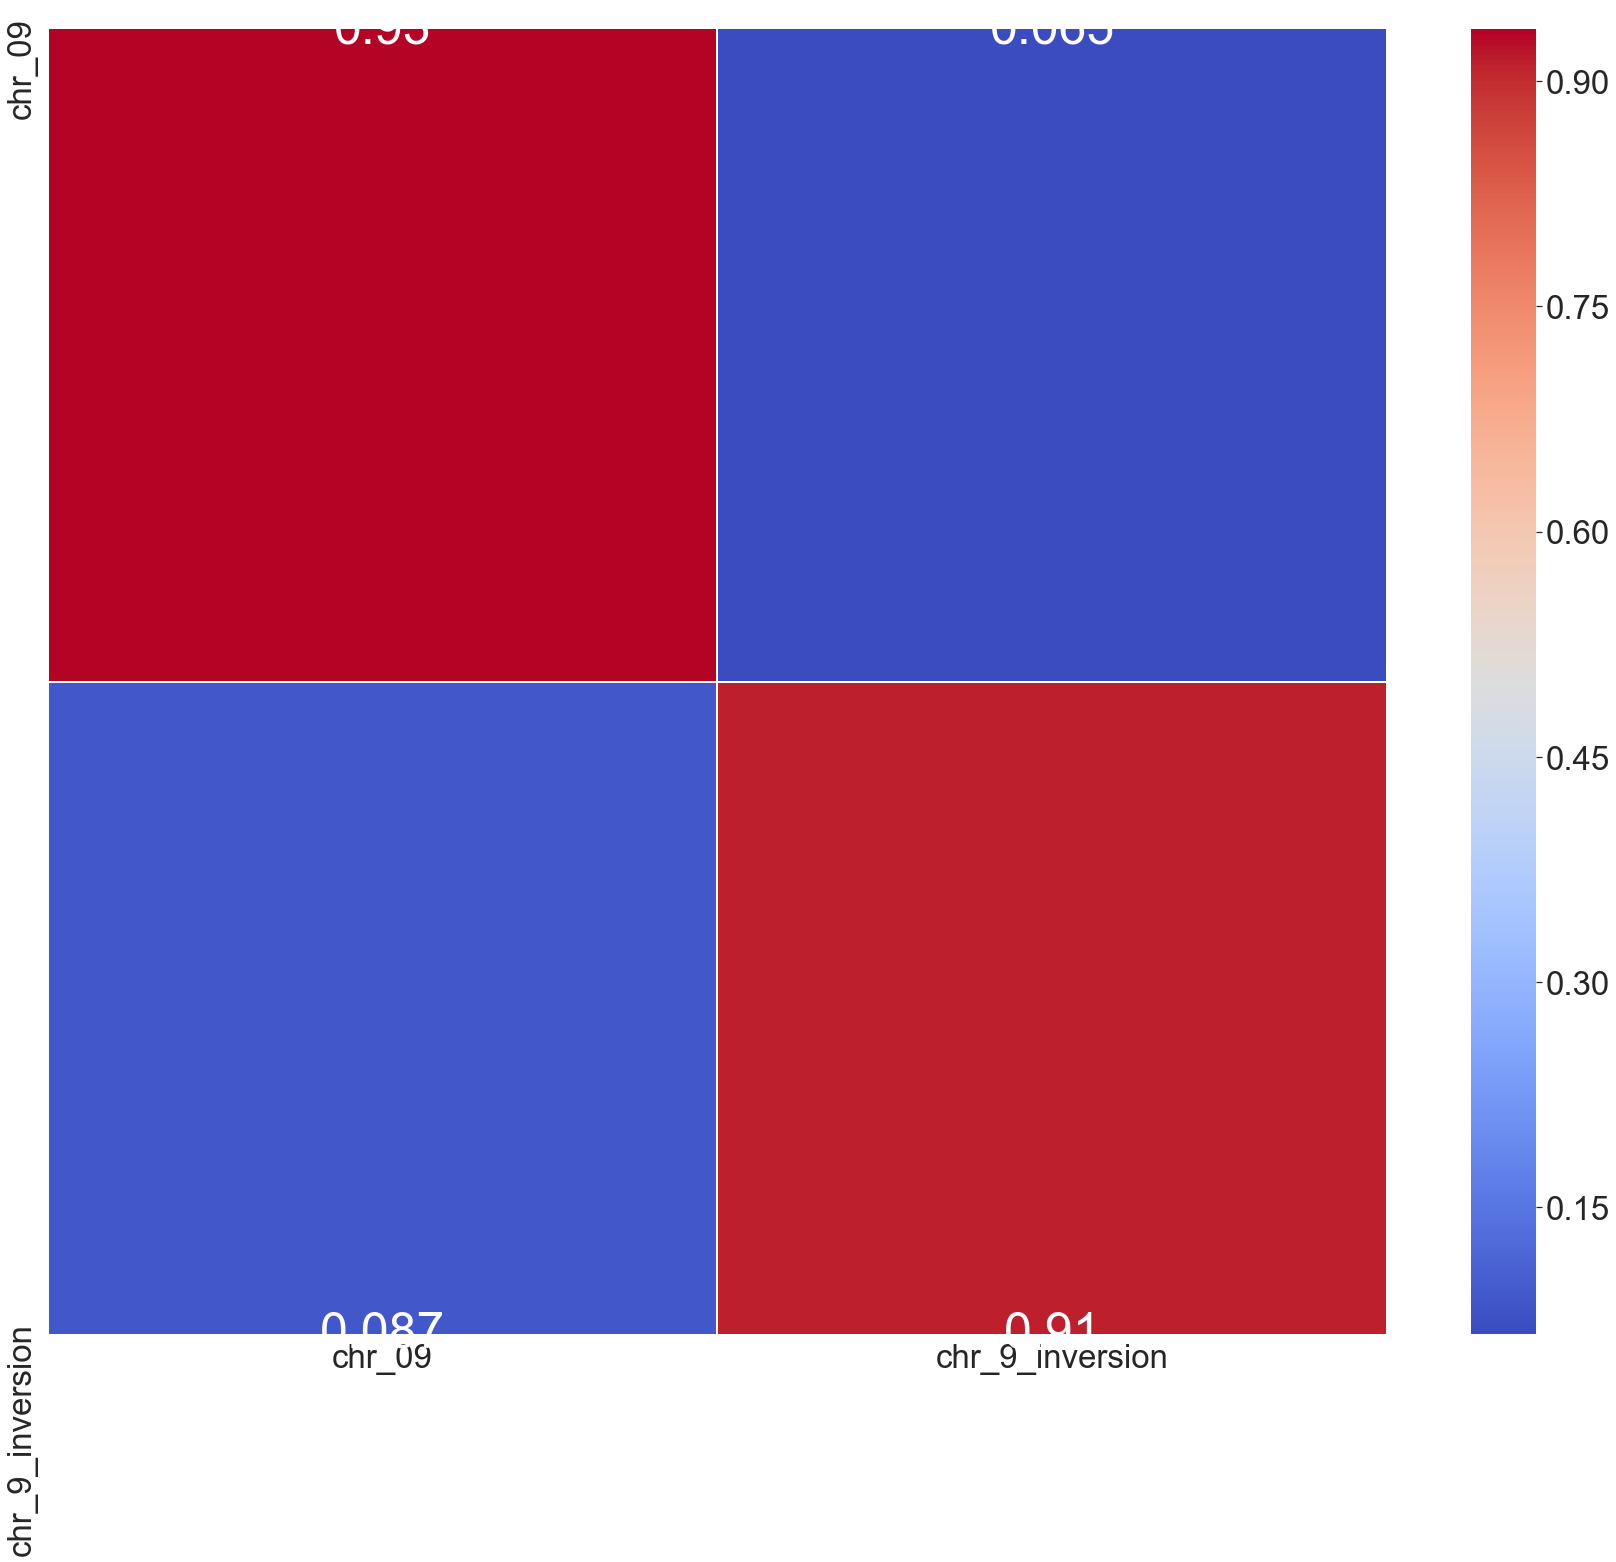

In [26]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 50})
sb.set(font_scale = 4)

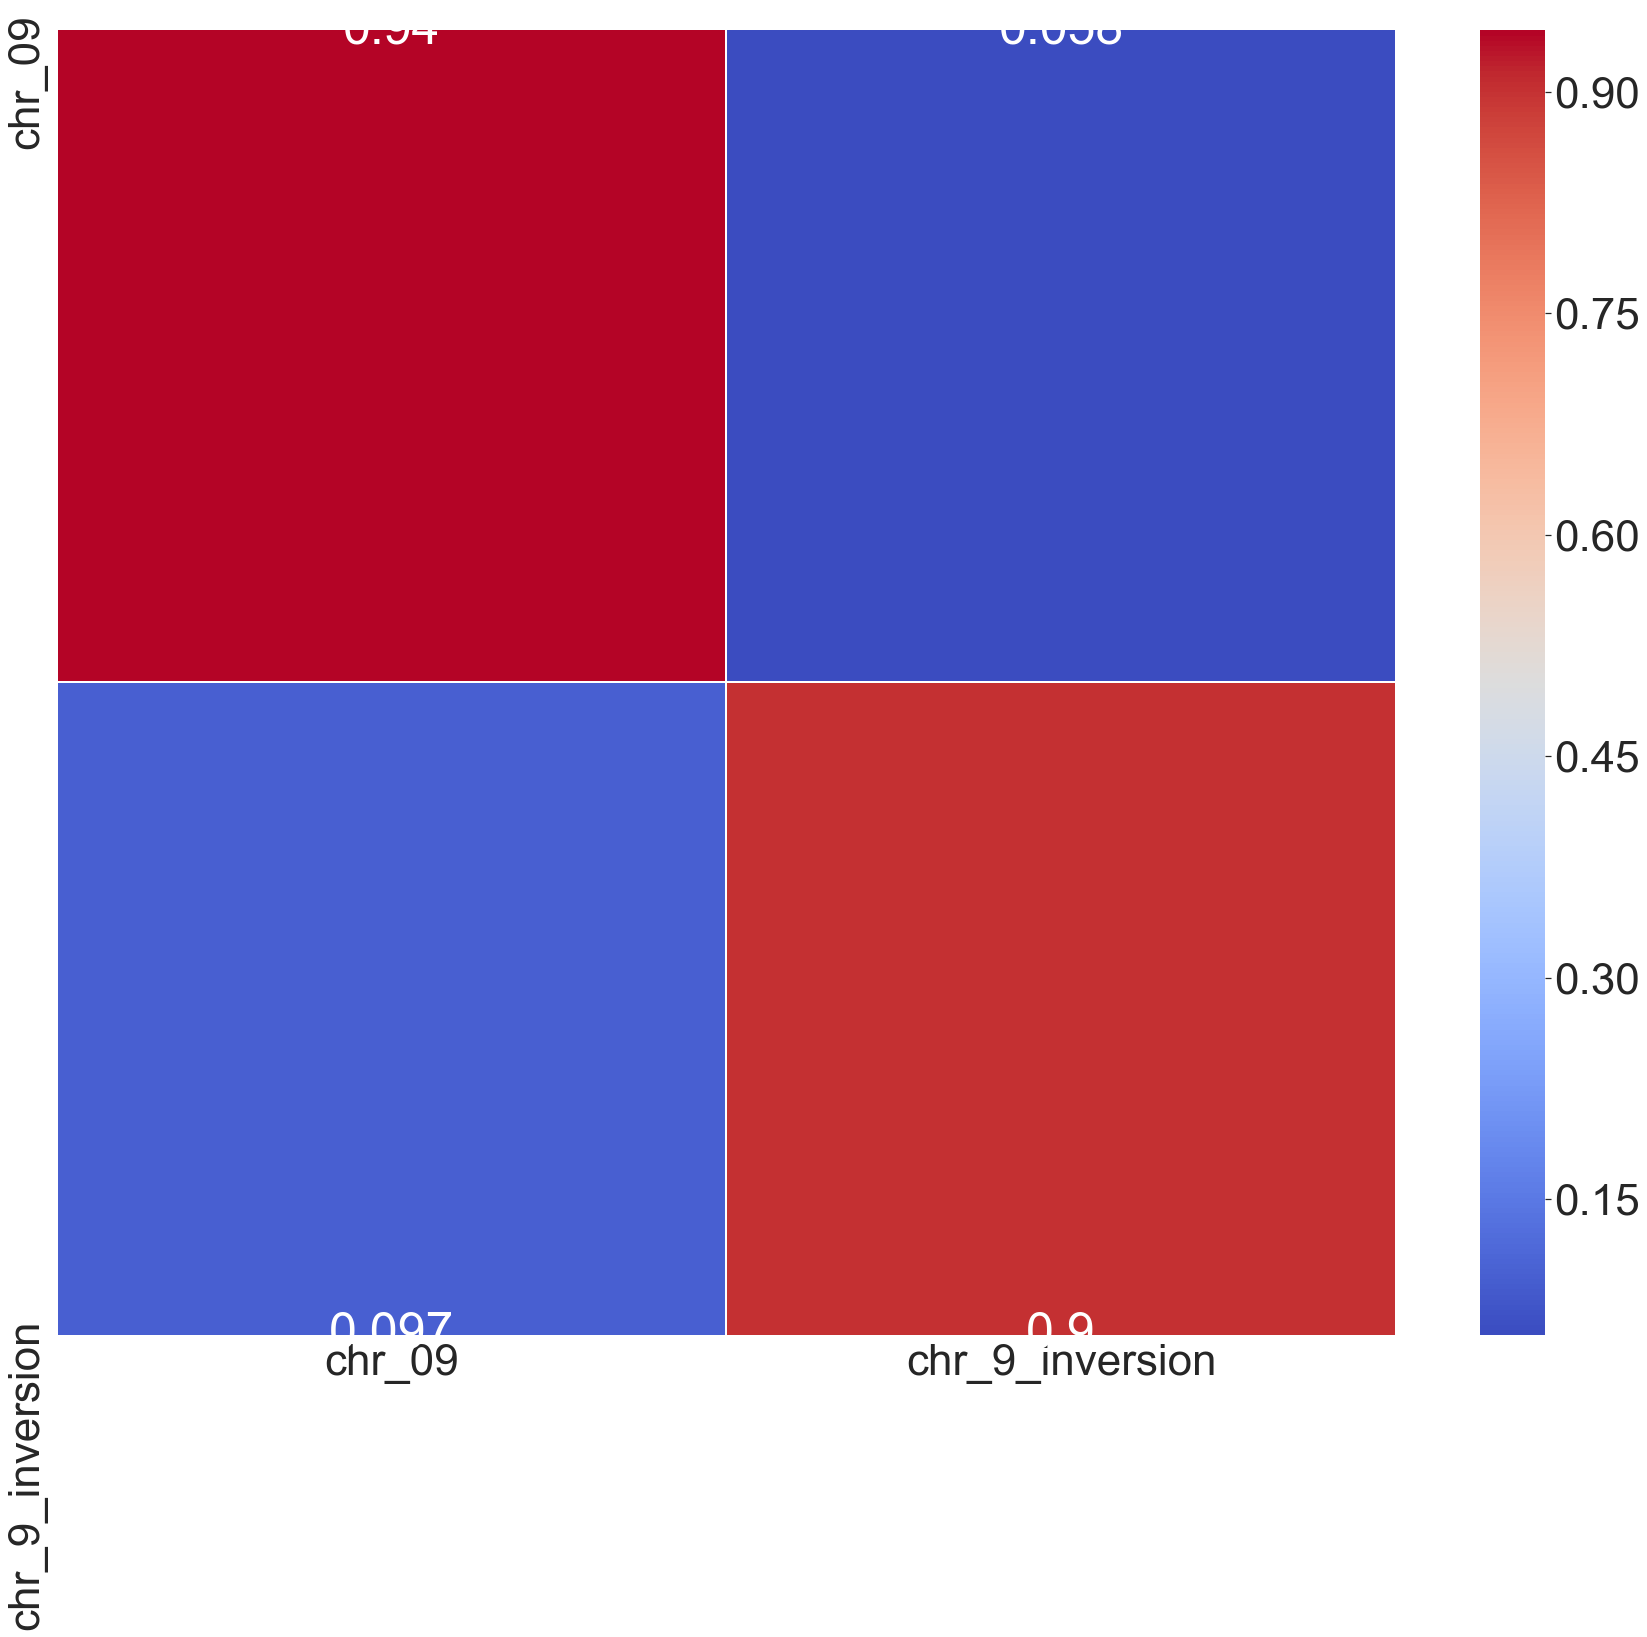

In [27]:
plt.figure(figsize=(30, 24))
heat_map_p = sb.heatmap(confusion_p, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 50})
sb.set(font_scale = 4)

In [28]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Combination.png', dpi=400)

In [29]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Recall_Combination.png', dpi=400)

In [30]:
fig_p = heat_map_p.get_figure()    
fig_p.savefig('Heatmap_Precision_Combination.png', dpi=400)

MemoryError: In RendererAgg: Out of memory

# ROC Curve

In [ ]:
y_predict_concatenate_array = np.array(y_predict_concatenate_list)
y_predict_concatenate_array

In [ ]:
y_predict_concatenate_array.shape

In [ ]:
y_predict_1D = y_predict_concatenate_array[:,0]

In [ ]:
y_predict_1D_processed = 1- y_predict_1D

In [ ]:
fpr , tpr , thresholds = roc_curve(y_test_concatenate_list , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [ ]:
auc_rf

In [ ]:
x = y = np.arange(0, 1.1, 0.1)

In [ ]:
x

In [ ]:
fig = plt.figure()
plt.style.use('classic')

ax = fig.add_subplot(111)

plt.plot(fpr, tpr, color='blue', linewidth=0.9)

plt.plot(x, y, '--', color='black', linewidth=0.8)

plt.title('ROC curve of Chr_09 Inversion', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=15, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=15, fontname = 'Times New Roman')
ax.set_aspect('equal', adjustable='box')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=15, fontname = 'Arial')
plt.yticks(fontsize=15, fontname = 'Arial')

plt.savefig('ROC_Curve_Combination.png', dpi=800)
plt.show()

#### 3.10.4.1 AUC Value

In [ ]:
auc_value = auc(fpr, tpr)

In [ ]:
print('AUC is ', auc_value)

# Results

In [ ]:
print('Test Accuracy: %.3f' % acc)

In [ ]:
print(performanceReport)

In [ ]:
type(performanceReport)

In [ ]:
print('AUC is ', auc_value)

## Export to a text file

In [ ]:
file_report = open('ResultsCombination.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.write('Recall of Confusion Matrix: \n%s.\n\n' % confusion_r)
file_report.write('Precision of Confusion Matrix: \n%s.\n\n' % confusion_p)
file_report.close()

## Export ROC Parameters

In [ ]:
with open('tpr_' + label_convert[1] + '.npy', 'wb') as file_tpr:
    np.save(file_tpr, np.array(tpr))
    
with open('fpr_' + label_convert[1] + '.npy', 'wb') as file_fpr:
    np.save(file_fpr, np.array(fpr))
    
with open('thresholds_' + label_convert[1] + '.npy', 'wb') as file_thresholds:
    np.save(file_thresholds, np.array(thresholds))